# Analysis of drug-related offenses in NZ
## Celin Heo

## Introduction
The issue of drug-related offenses is of paramount concern to law enforcement agencies and policymakers worldwide, and New Zealand is no exception. In New Zealand, a referendum was held on October 17, 2020, to determine whether the recreational use of cannabis should be legalized. (Official referendum results released, 2020). Understanding the patterns and variations in drug-related offenses is crucial in developing effective strategies to combat drug abuse, improve public health outcomes, and allocate resources appropriately. In this report we will focus on examining data from the New Zealand Police. By analyzing this dataset, we aim to gain insight into drug-related offenses and identify any notable variation across different drug types, and regions in the country.


## Method
The analysis in this report is based on data collected from the New Zealand Police’s official records. The dataset used in this report provides comprehensive information on drug-related crimes reported over the past decade. It includes details such as the type of drug involved, the region where the offense occurred, and the year of the reported incident.

To investigate the overall trend in drug-related offenses, the dataset was analyzed on a monthly basis. The total number of drug related offenses reported each month was calculated, and a line graph was created to show the trend over time. Each point on the graph represents a specific month, while the vertical axis represents the number of reported offenses. This analysis aimed to identify any noticeable patterns or changes in the overall number of drug-related offenses reported throughout the past decade.

To explore the trend of drug-related offenses by drug type, the offenses were categorized based on the specific drug involved. The dataset was grouped according to various drug types, such as Cannabis, Ecstasy, Fantasy, LSD, and Methamphetamine. The number of offenses reported for each drug type was calculated per year from 2013 to 2021. A line graph was generated to visualize the trend. Each line on the graph represents a specific drug type. The horizontal axis represents the year, and the vertical axis represents the total number of offenses. This investigation aimed to identify any significant variation in the number of offenses reported for different drug types over time.

To assess the tendency in drug-related offenses by region, the dataset was grouped according to the regions of New Zealand. The number of offenses reported in each region was computed for the entire period (from 2013-2021). A bar graph was created to show which region has the highest occupancy of drug-related offences. Each bar represents a specific region, and the height of the bar indicates the number of offenses. This analysis aimed to identify any regional disparities or variations in the number of drug-related offenses.


## Result


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 10 × 3
   Year  Count Total
   <chr> <int> <int>
 1 2014   3683 62338
 2 2015   7437 62338
 3 2016   7838 62338
 4 2017   7447 62338
 5 2018   7716 62338
 6 2019   7629 62338
 7 2020   8143 62338
 8 2021   5913 62338
 9 2022   5251 62338
10 2023   1281 62338


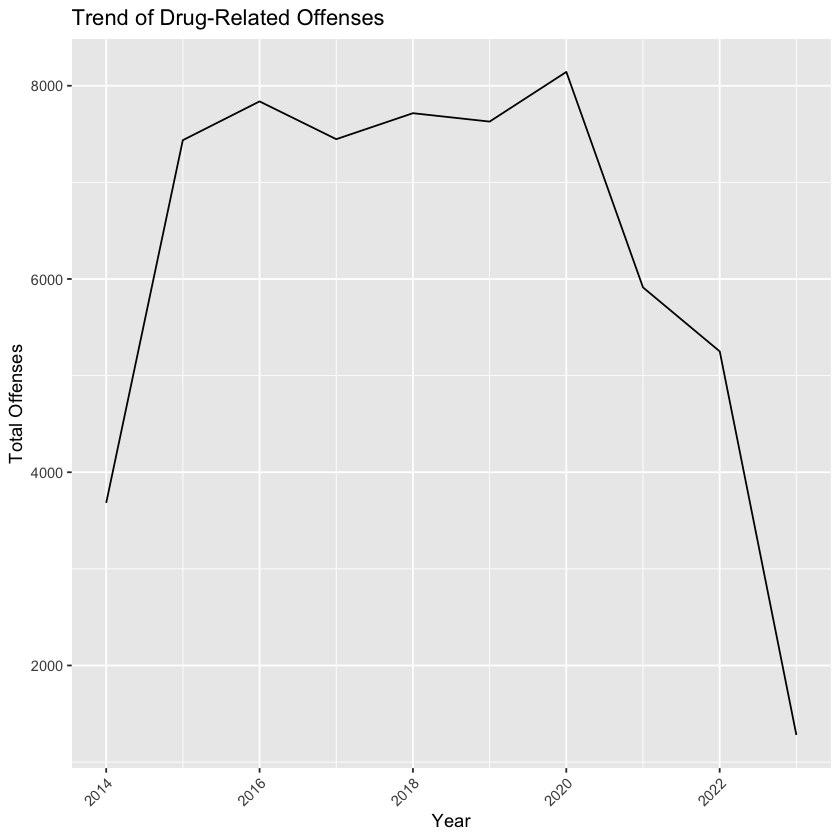

In [1]:
library(ggplot2)
library(dplyr)

# Import dataset
crime_data <- read.csv("DrugCrime_data.csv", fileEncoding = "UTF-16LE", sep = "\t")

# Rename the "Year.Month" variable to "Date"
names(crime_data)[names(crime_data) == "Anzsoc.Division"] <- "Division"
names(crime_data)[names(crime_data) == "Police.District"] <- "District"

# Convert the "Year.Month" column to a Date type and extract the year
crime_data$Date <- as.Date(crime_data$Year.Month, format = "%Y.%m.%d")


# Create a table of crime counts per year
crime_per_year <- table(crime_data$Date)
crime_per_year <- as.data.frame(crime_per_year)

# Rename the variables in crime_per_year
colnames(crime_per_year) <- c('Year', 'Count')

# Extract the year from the Date column
crime_per_year$Year <- substring(crime_per_year$Year, 1, 7)

# Extract the year from the Date column
crime_data$Year <- format(crime_data$Date, "%Y")

# Create a table of crime counts per year
crime_per_year <- crime_data %>%
  group_by(Year) %>%
  summarise(Count = n())

# Calculate the total offenses for each year
crime_per_year <- crime_per_year %>%
  mutate(Total = sum(Count))

# Order the data by year
crime_per_year <- crime_per_year[order(crime_per_year$Year),]

print(crime_per_year)

# Plot the data
ggplot(data = crime_per_year, aes(x = as.numeric(Year), y = Count, group = 1)) +
  geom_line() +
  labs(title = "Trend of Drug-Related Offenses", x = "Year", y = "Total Offenses") +
  scale_x_continuous(breaks = seq(min(as.numeric(crime_per_year$Year)), max(as.numeric(crime_per_year$Year)), by = 2)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The analysis of the dataset revealed a fluctuating trend in the number of drug-related offenses. Although there were fluctuations with periods of increases and decreases, overall the trend demonstrated a decline in drug-related offenses during the period (07.2014 – 03.2023).\

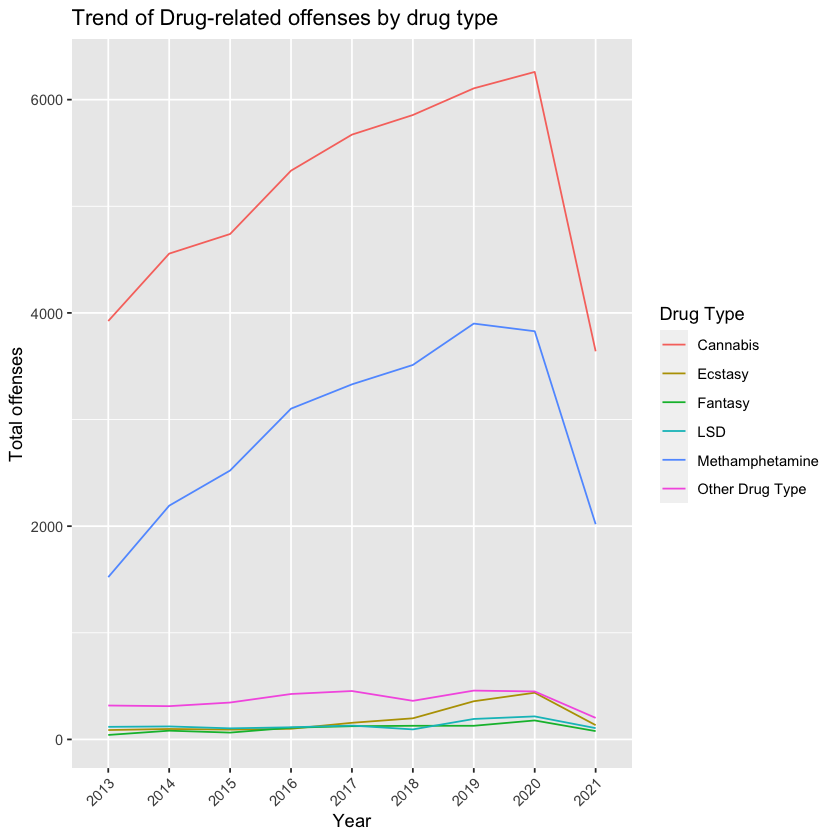

In [2]:
# Import data
drugtype_data <- read.csv("DrugType_data.csv", fileEncoding = "UTF-16LE", sep = "\t")

# Rename variables
names(drugtype_data)[names(drugtype_data) == "Drug.Type"] <- "Type"
names(drugtype_data)[names(drugtype_data) == "Month.Year"] <- "Date"

# Extract the year from the Date column
drugtype_data$Year <- substring(drugtype_data$Date, 7, 10)

# Group the data by year and drug type, and calculate the total crimes
yearly_totals <- drugtype_data %>%
  group_by(Year, Type) %>%
  summarize(Total_Crimes = n(), .groups = 'drop')

# Convert Total_Crimes to numeric type
yearly_totals$Total_Crimes <- as.numeric(yearly_totals$Total_Crimes)

# Plot the line graph using ggplot
ggplot(data = yearly_totals, aes(x = Year, y = Total_Crimes, group = Type, color = Type)) +
  geom_line() +
  labs(title = "Trend of Drug-related offenses by drug type", x = "Year", y = "Total offenses") +
  scale_color_discrete(name = "Drug Type") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The analysis of the dataset categorized by drug type and represented by line graphs per year provided insights into the trends for specific drugs in New Zealand. Cannabis and methamphetamine were the most common drug offenses. For cannabis, the analysis revealed a consistent increase in reported offenses from 2013 to 2020. Similarly, the number of methamphetamine-related offenses steadily increased during the same period.

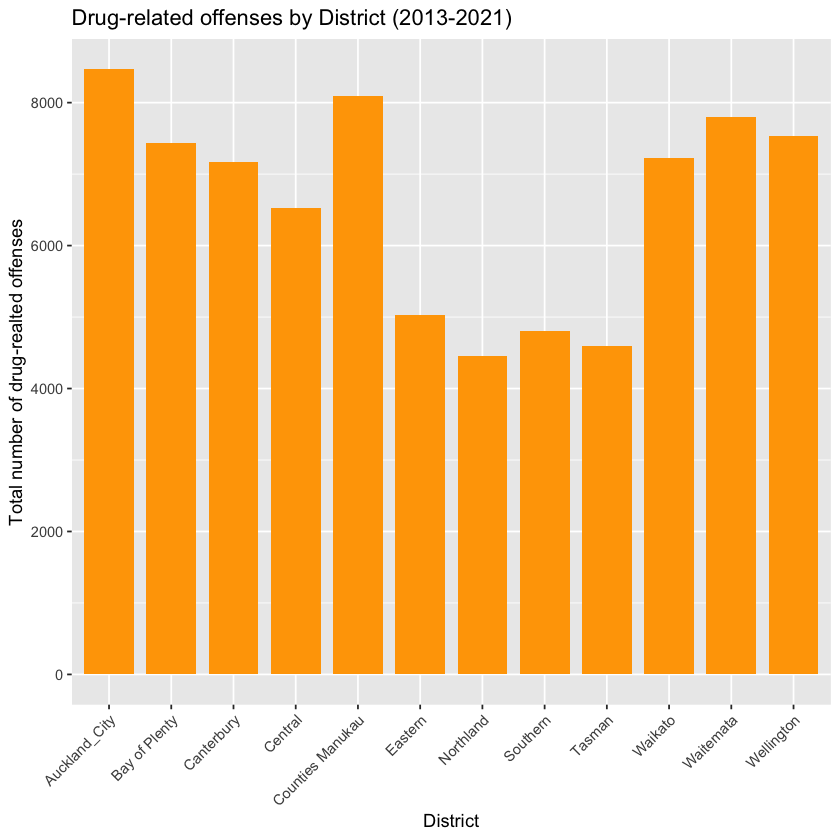

In [3]:
# Import data
drugtype_data <- read.csv("DrugType_data.csv", fileEncoding = "UTF-16LE", sep = "\t")

#Convert to a data frame
crime_by_district = table(drugtype_data$District)
crime_by_district = as.data.frame(crime_by_district)

colnames(crime_by_district) <- c("District", "Count")

# Plot the total number of crime by district using ggplot
ggplot(crime_by_district, aes(x = District, y = Count)) +
  geom_bar(stat = "identity", fill = "orange", width = 0.8) +
  labs(title = "Drug-related offenses by District (2013-2021)", x = "District", y = "Total number of drug-realted offenses") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The analysis of the dataset categorized by region and represented by this bar graph, shows that the occupancy of drug-related offenses in North Island is higher than in South Island. Among the regions, Auckland City reported the highest number of
offenses.

## Discussion
The purpose of this report was to analyze the trend in the number of drug-related offenses reported to the New Zealand Police over the past decade and examine how this trend varied by drug type and region in the country. Through the analysis of the dataset, several key findings emerged, which provide insights into
Firstly, the overall trend analysis designated a gradual decrease in the number of drug- related offense. The overall downward trend suggests that efforts to combat drug- related crime in New Zealand may be yielding some positive results. However, it is important to note that further investigation is necessary to understand the underlying factors contributing to this decline.
When examining the trend in drug-related offenses by drug type, cannabis and methamphetamine stood out as the most prevalent drugs. Both drug types displayed increasing trends from 2013 to 2020. The rising number of both drug types-related offenses suggests a need for continued focus on addressing the issues associated with their use, cultivation and need for prevention programs.
The analysis of regional variation in drug-related offenses disclosed that the occupancy of offense was higher in the North Island compared with the South Island. Auckland city reported the highest number of drug-related offenses among the analyzed regions. These findings highlight the need for tailored strategies and resources to address the challenges faced by high-occupancy regions like Auckland City, Counties Manukau. Efforts to enhance community engagement, education, and support service should be prioritized to mitigate the impact of drug-related offenses in these areas.
Based on the findings of this analysis, several recommendations can be made.
1. Strengthen prevention and education programs.
Focus on preventive measure and educational campaigns to raise awareness about the risks of drug use, particularly for cannabis and methamphetamine.
2. Adopt a regional approach.
Encourage collaboration among local communities, and non-profit organizations to address regional disparities and implement targeted interventions.
3. Invest in treatment and rehabilitation services.
Prioritize resources for accessible and effective treatment and rehabilitation programs to support individuals struggling with drug addiction. Provide necessary tools and support to help users overcome substance abuse issues.

## Reference
Official referendum results released, ELECTORAL COMMISION, Nov 6 2020